Antonio Reyes

Dieter de Wit

# Build your first Neural Network to predict house prices with Keras

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('housepricedata.csv')
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [3]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [4]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [5]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [6]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [8]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

Using TensorFlow backend.


In [10]:
Dense(32, activation='relu', input_shape=(10,)),

(<keras.layers.core.Dense at 0x213cd142388>,)

In [11]:
Dense(32, activation='relu'),
Dense(1, activation='sigmoid')

In [12]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
optimizer='sgd'

In [14]:
loss='binary_crossentropy'

In [15]:
metrics=['accuracy']

In [16]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 175us/step - loss: 0.6901 - accuracy: 0.5000 - val_loss: 0.6774 - val_accuracy: 0.5160
Epoch 2/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.6794 - accuracy: 0.5000 - val_loss: 0.6687 - val_accuracy: 0.5160
Epoch 3/100
1022/1022 [==============================] - 0s 72us/step - loss: 0.6705 - accuracy: 0.5010 - val_loss: 0.6611 - val_accuracy: 0.5160
Epoch 4/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.6634 - accuracy: 0.5108 - val_loss: 0.6549 - val_accuracy: 0.5251
Epoch 5/100
1022/1022 [==============================] - 0s 63us/step - loss: 0.6578 - accuracy: 0.5548 - val_loss: 0.6495 - val_accuracy: 0.5936
Epoch 6/100
1022/1022 [==============================] - 0s 64us/step - loss: 0.6528 - accuracy: 0.6076 - val_loss: 0.6445 - val_accuracy: 0.6530
Epoch 7/100
1022/1022 [==============================] - 0s 64us/step - loss

In [17]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 36us/step


0.922374427318573

# Visualizar

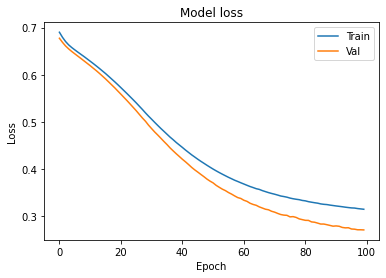

In [18]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

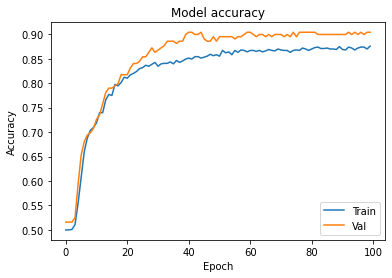

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

# Adding Regularization

In [26]:


model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))



Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5100 - accuracy: 0.7769 - val_loss: 0.3423 - val_accuracy: 0.8858
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3629 - accuracy: 0.8464 - val_loss: 0.3143 - val_accuracy: 0.8950
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3326 - accuracy: 0.8591 - val_loss: 0.3028 - val_accuracy: 0.8904
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3212 - accuracy: 0.8767 - val_loss: 0.2795 - val_accuracy: 0.8858
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3286 - accuracy: 0.8552 - val_loss: 0.3139 - val_accuracy: 0.8904
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3312 - accuracy: 0.8699 - val_loss: 0.3146 - val_accuracy: 0.8813
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.3262

Epoch 57/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1662 - accuracy: 0.9217 - val_loss: 0.2440 - val_accuracy: 0.9087
Epoch 58/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1761 - accuracy: 0.9207 - val_loss: 0.3082 - val_accuracy: 0.8995
Epoch 59/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2282 - accuracy: 0.9080 - val_loss: 0.2067 - val_accuracy: 0.9087
Epoch 60/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2146 - accuracy: 0.9149 - val_loss: 0.2155 - val_accuracy: 0.9132
Epoch 61/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1957 - accuracy: 0.9149 - val_loss: 0.2473 - val_accuracy: 0.9087
Epoch 62/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1739 - accuracy: 0.9198 - val_loss: 0.2922 - val_accuracy: 0.8950
Epoch 63/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.1816 - accuracy: 0.9198 - val_loss: 0.2445 -

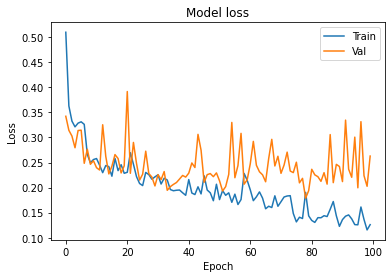

In [27]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

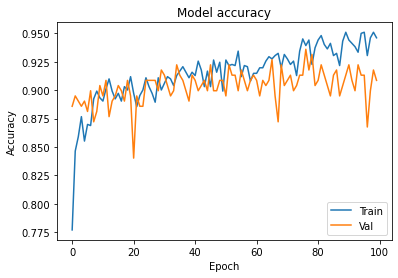

In [29]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
from keras.layers import Dropout
from keras import regularizers

In [31]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [32]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 3s 3ms/step - loss: 14.7089 - accuracy: 0.5841 - val_loss: 4.0367 - val_accuracy: 0.7671
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.7172 - accuracy: 0.8170 - val_loss: 0.6163 - val_accuracy: 0.8904
Epoch 3/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.6017 - accuracy: 0.8356 - val_loss: 0.4731 - val_accuracy: 0.8950
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5278 - accuracy: 0.8444 - val_loss: 0.4922 - val_accuracy: 0.8858
Epoch 5/100
1022/1022 [==============================] - 3s 2ms/step - loss: 0.5303 - accuracy: 0.8405 - val_loss: 0.4566 - val_accuracy: 0.8995
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4929 - accuracy: 0.8640 - val_loss: 0.4290 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.490

Epoch 57/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4447 - accuracy: 0.8708 - val_loss: 0.3988 - val_accuracy: 0.9132
Epoch 58/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4621 - accuracy: 0.8630 - val_loss: 0.4227 - val_accuracy: 0.9041
Epoch 59/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4517 - accuracy: 0.8738 - val_loss: 0.3908 - val_accuracy: 0.9132
Epoch 60/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4414 - accuracy: 0.8738 - val_loss: 0.3917 - val_accuracy: 0.9132
Epoch 61/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4702 - accuracy: 0.8748 - val_loss: 0.4429 - val_accuracy: 0.8995
Epoch 62/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4727 - accuracy: 0.8620 - val_loss: 0.3930 - val_accuracy: 0.9087
Epoch 63/100
1022/1022 [==============================] - 3s 3ms/step - loss: 0.4434 - accuracy: 0.8689 - val_loss: 0.3904 -

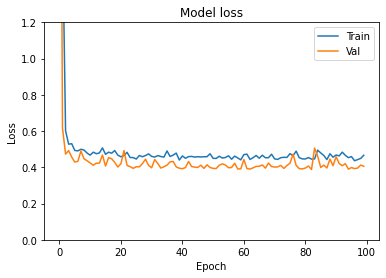

In [33]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

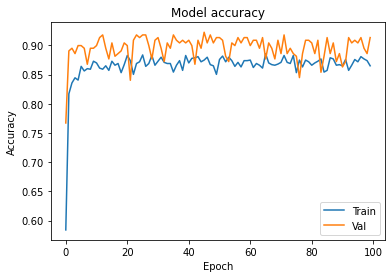

In [35]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()